# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [54]:
# Use this cell for your code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dset = pd.read_csv('titiantic.csv')
print(dset.shape)

(891, 12)


2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [55]:
# Use this cell for your code
dp = dset.drop(columns=['Name', 'Ticket', 'PassengerId'])
# print(dp.shape)

3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [56]:
# Use this cell for your code
dd = dp.copy()
dd['Deck'] = dd['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else np.nan)
dd = dd.drop(columns=['Cabin'])
# print(dd['Deck'].unique()) 

4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [57]:
# Use this cell for your code
dn = dd.copy()
for col in ["Sex","Deck","Embarked"]:
    dn[col] = pd.Categorical(dn[col])
print(dn.head(10))


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Deck
0         0       3    male  22.0      1      0   7.2500        S  NaN
1         1       1  female  38.0      1      0  71.2833        C    C
2         1       3  female  26.0      0      0   7.9250        S  NaN
3         1       1  female  35.0      1      0  53.1000        S    C
4         0       3    male  35.0      0      0   8.0500        S  NaN
5         0       3    male   NaN      0      0   8.4583        Q  NaN
6         0       1    male  54.0      0      0  51.8625        S    E
7         0       3    male   2.0      3      1  21.0750        S  NaN
8         1       3  female  27.0      0      2  11.1333        S  NaN
9         1       2  female  14.0      1      0  30.0708        C  NaN


5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [58]:
# Use this cell for your code
df = dn.copy()
for col in ["Survived","Pclass","Age","SibSp","Parch","Fare"]:
    df[col] = df[col].fillna(df[col].median())
for col in ["Sex","Deck","Embarked"]:
    df[col] = df[col].fillna(df[col].mode()[0])
print(df.head(10))

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Deck
0         0       3    male  22.0      1      0   7.2500        S    C
1         1       1  female  38.0      1      0  71.2833        C    C
2         1       3  female  26.0      0      0   7.9250        S    C
3         1       1  female  35.0      1      0  53.1000        S    C
4         0       3    male  35.0      0      0   8.0500        S    C
5         0       3    male  28.0      0      0   8.4583        Q    C
6         0       1    male  54.0      0      0  51.8625        S    E
7         0       3    male   2.0      3      1  21.0750        S    C
8         1       3  female  27.0      0      2  11.1333        S    C
9         1       2  female  14.0      1      0  30.0708        C    C


6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [59]:

#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [60]:
# Use this cell for your code
df.to_csv('titanic_processed.csv', index=False)
import json
with open('titanic_processed.json', 'w', encoding='utf-8') as f:
    json.dump(df.to_dict(orient='records'), f, indent=4)


Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [61]:
# Use this cell for your code
categorical_cols = ["Sex", "Deck", "Embarked"]
numerical_cols = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
for col in categorical_cols:
    print(f"{col}: {df[col].mode()[0]}")
for col in numerical_cols:
    print(f"{col}: {df[col].median()}")


Sex: male
Deck: C
Embarked: S
Pclass: 3.0
Age: 28.0
SibSp: 0.0
Parch: 0.0
Fare: 14.4542


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [62]:
# Use this cell for your code

survivors = df[df["Survived"] == 1]
nonsurvivors = df[df["Survived"] == 0]

avg_survivor = {}
avg_nonsurvivor = {}

for col in categorical_cols:
    avg_survivor[col] = survivors[col].mode()[0]
    avg_nonsurvivor[col] = nonsurvivors[col].mode()[0]
for col in numerical_cols:
    avg_survivor[col] = survivors[col].median()
    avg_nonsurvivor[col] = nonsurvivors[col].median()

print("Average survivor:", avg_survivor)
print("Average non-survivor:", avg_nonsurvivor)

Average survivor: {'Sex': 'female', 'Deck': 'C', 'Embarked': 'S', 'Pclass': 2.0, 'Age': 28.0, 'SibSp': 0.0, 'Parch': 0.0, 'Fare': 26.0}
Average non-survivor: {'Sex': 'male', 'Deck': 'C', 'Embarked': 'S', 'Pclass': 3.0, 'Age': 28.0, 'SibSp': 0.0, 'Parch': 0.0, 'Fare': 10.5}


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

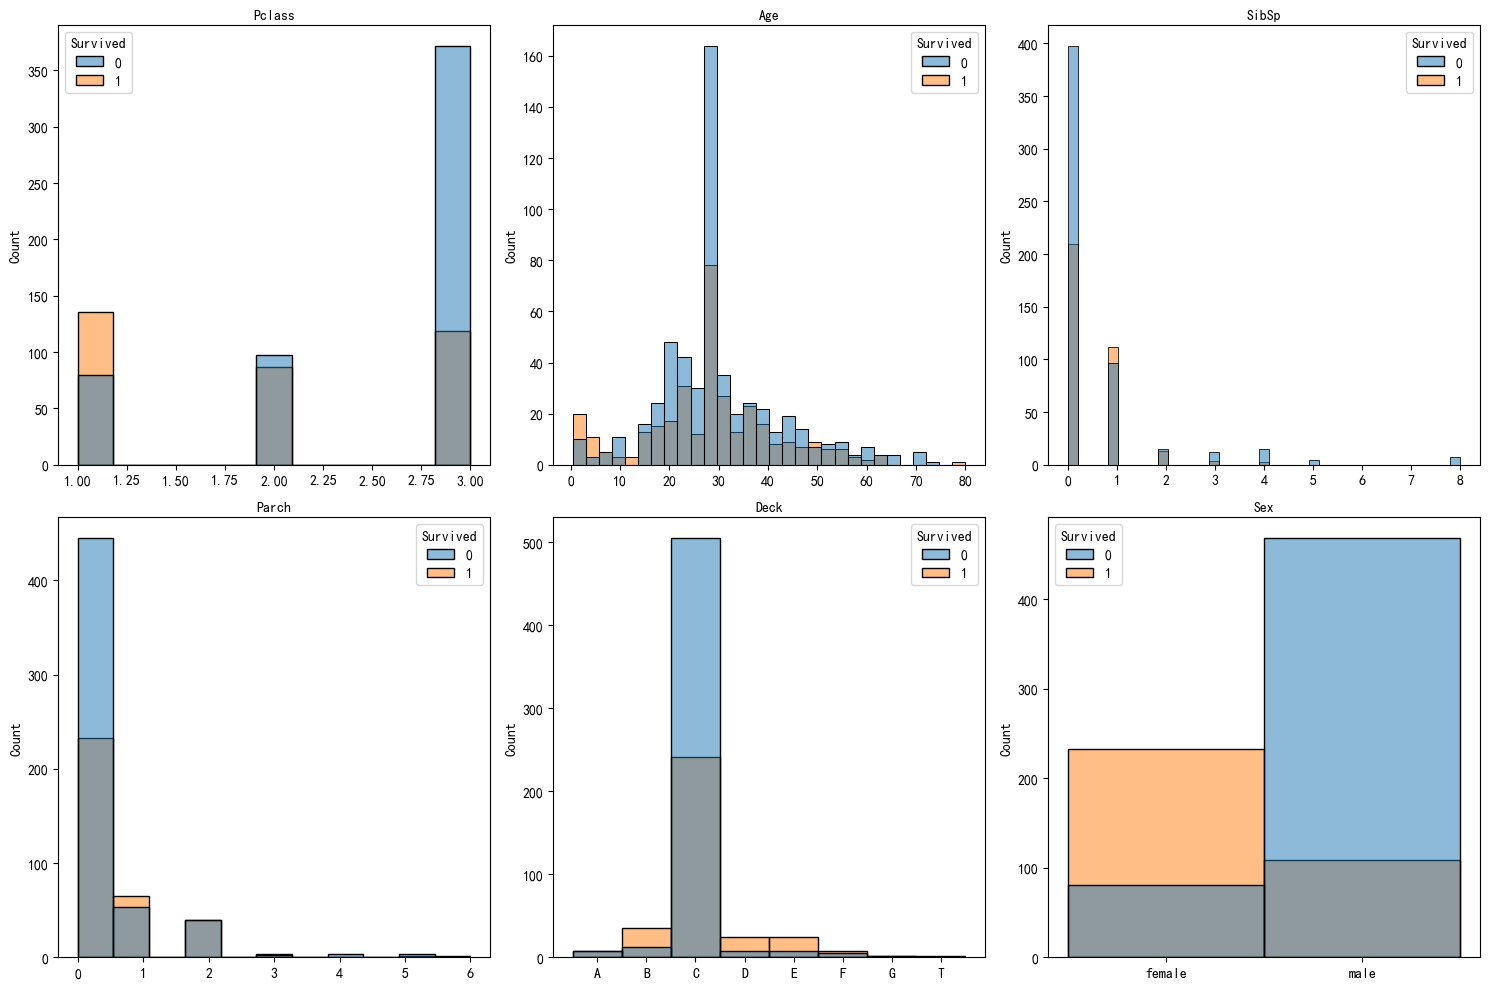

In [63]:
# Use this cell for your code
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 可视化主要变量的分布
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
cols = ["Pclass", "Age", "SibSp", "Parch", "Deck", "Sex"]
for i, col in enumerate(cols):
    ax = axs[i // 3, i % 3]
    sns.histplot(data=df, x=col, hue="Survived", ax=ax, element="bars")
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(col)
plt.tight_layout()
plt.show()


In [64]:

def find_closest_passengers(df, avg_survivor, avg_nonsurvivor):
    df_encoded = df.copy()
    
    # 为分类变量创建编码器字典
    encoders = {}
    for col in ["Sex", "Deck", "Embarked"]:
        if not pd.api.types.is_categorical_dtype(df_encoded[col]):
            # 确保列是分类类型
            df_encoded[col] = df_encoded[col].astype('category')
        # 创建编码器字典
        encoders[col] = {cat: code for code, cat in enumerate(df_encoded[col].cat.categories)}
        # 转换为编码
        df_encoded[col] = df_encoded[col].cat.codes
    
    # 创建编码后的平均值字典
    avg_survivor_encoded = avg_survivor.copy()
    avg_nonsurvivor_encoded = avg_nonsurvivor.copy()
    for col in ["Sex", "Deck", "Embarked"]:
        if col in avg_survivor_encoded and avg_survivor_encoded[col] in encoders[col]:
            avg_survivor_encoded[col] = encoders[col][avg_survivor_encoded[col]]
        if col in avg_nonsurvivor_encoded and avg_nonsurvivor_encoded[col] in encoders[col]:
            avg_nonsurvivor_encoded[col] = encoders[col][avg_nonsurvivor_encoded[col]]
    
    survivor_distances = []
    nonsurvivor_distances = []
    features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex", "Deck", "Embarked"]
    
    for idx, row in df_encoded.iterrows():
        survivor_dist = 0
        nonsurvivor_dist = 0
        
        for feature in features:
            if feature in ["Age", "Fare"]: 
                feature_min = df_encoded[feature].min()
                feature_max = df_encoded[feature].max()
                feature_range = max(1, feature_max - feature_min)  
                
                survivor_dist += ((row[feature] - avg_survivor_encoded[feature]) / feature_range) ** 2
                nonsurvivor_dist += ((row[feature] - avg_nonsurvivor_encoded[feature]) / feature_range) ** 2
            else: 
                survivor_dist += abs(row[feature] - avg_survivor_encoded[feature])
                nonsurvivor_dist += abs(row[feature] - avg_nonsurvivor_encoded[feature])
        
        survivor_distances.append(np.sqrt(survivor_dist)) 
        nonsurvivor_distances.append(np.sqrt(nonsurvivor_dist))
    
    closest_to_survivor_idx = np.argmin(survivor_distances)
    closest_to_nonsurvivor_idx = np.argmin(nonsurvivor_distances)
    
    return {
        "closest_to_survivor": {
            "passenger_data": df.iloc[closest_to_survivor_idx]
        },
        "closest_to_nonsurvivor": {
            "passenger_data": df.iloc[closest_to_nonsurvivor_idx]
        }
    }

closest_passengers = find_closest_passengers(survivors, avg_survivor, avg_nonsurvivor)

print("survivors similar to avg_survivor:")
print(closest_passengers['closest_to_survivor']['passenger_data'].to_dict())
print("\nsurvivors similar to avg_nonsurvivor:")
print(closest_passengers['closest_to_nonsurvivor']['passenger_data'].to_dict())
closest_passengers = find_closest_passengers(nonsurvivors, avg_survivor, avg_nonsurvivor)
print("\nnonsurvivors similar to avg_survivor:")
print(closest_passengers['closest_to_survivor']['passenger_data'].to_dict())
print("\nnonsurvivors similar to avg_nonsurvivor:")
print(closest_passengers['closest_to_nonsurvivor']['passenger_data'].to_dict())


survivors similar to avg_survivor:
{'Survived': 1, 'Pclass': 2, 'Sex': 'female', 'Age': 28.0, 'SibSp': 0, 'Parch': 0, 'Fare': 33.0, 'Embarked': 'S', 'Deck': 'C'}

survivors similar to avg_nonsurvivor:
{'Survived': 1, 'Pclass': 3, 'Sex': 'male', 'Age': 28.0, 'SibSp': 0, 'Parch': 0, 'Fare': 8.1125, 'Embarked': 'S', 'Deck': 'C'}

nonsurvivors similar to avg_survivor:
{'Survived': 0, 'Pclass': 2, 'Sex': 'female', 'Age': 24.0, 'SibSp': 0, 'Parch': 0, 'Fare': 13.0, 'Embarked': 'S', 'Deck': 'C'}

nonsurvivors similar to avg_nonsurvivor:
{'Survived': 0, 'Pclass': 3, 'Sex': 'male', 'Age': 28.0, 'SibSp': 0, 'Parch': 0, 'Fare': 9.5, 'Embarked': 'S', 'Deck': 'C'}


4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



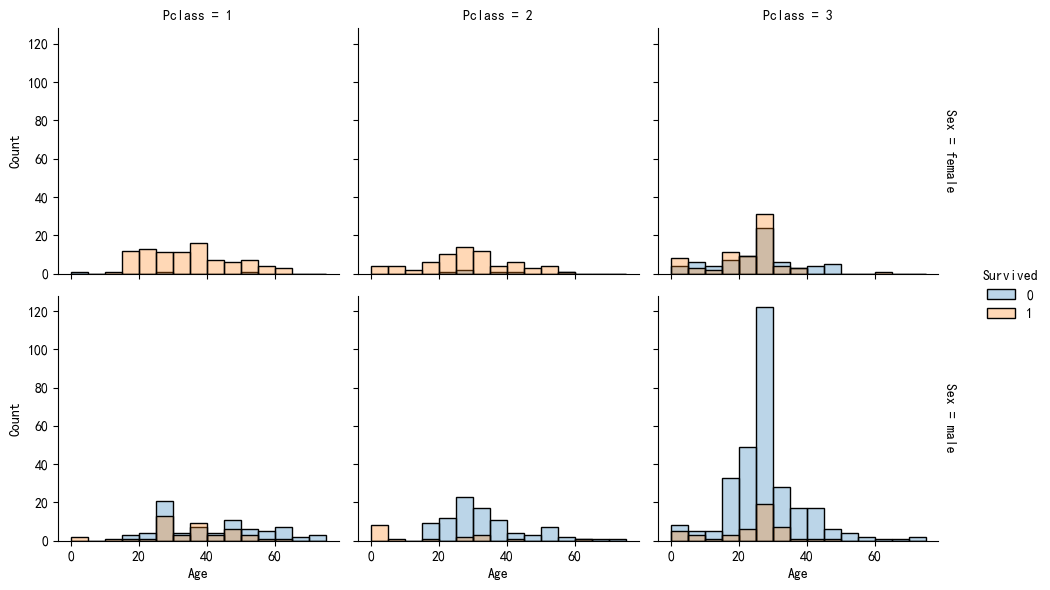

In [65]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', margin_titles=True, aspect=1.1)
g.map(sns.histplot, 'Age', kde=False, bins=bins, alpha=0.3)
g.add_legend()  
plt.show() 

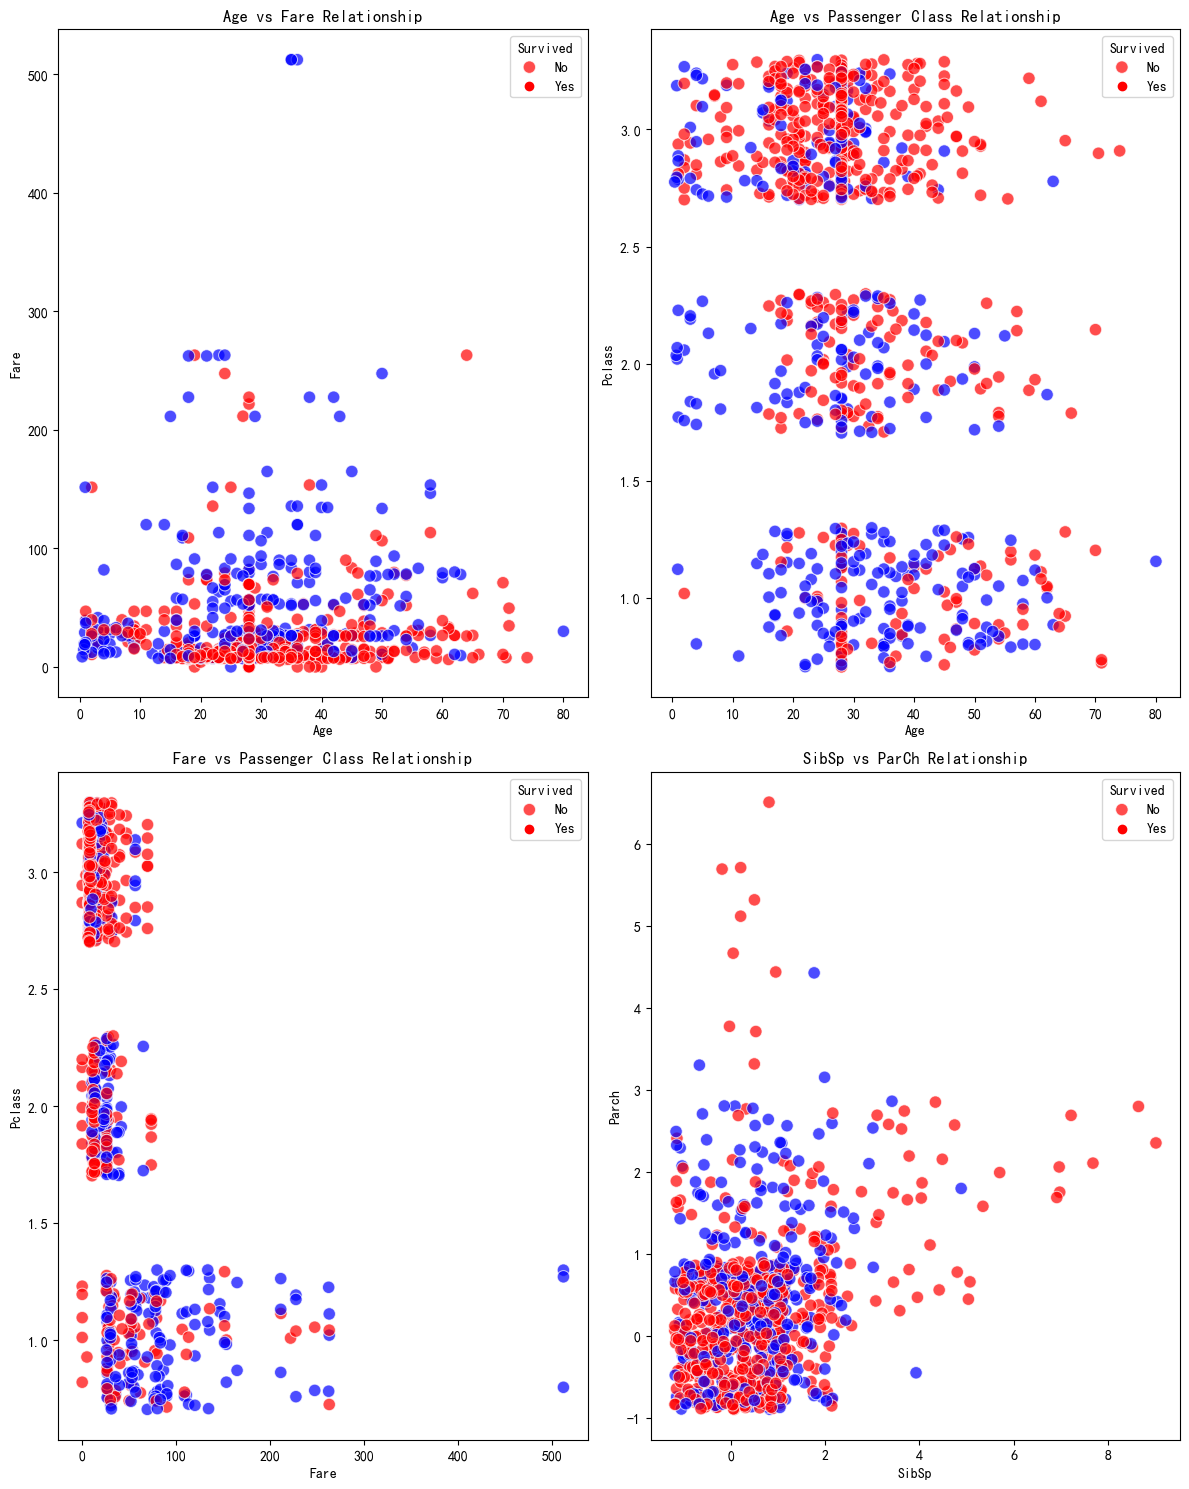

In [66]:

fig, axes = plt.subplots(2, 2, figsize=(12, 15))

# Define variable pairs and titles
variable_pairs = [
    ('Age', 'Fare', 'Age vs Fare Relationship'),
    ('Age', 'Pclass', 'Age vs Passenger Class Relationship'),
    ('Fare', 'Pclass', 'Fare vs Passenger Class Relationship'),
    ('SibSp', 'Parch', 'SibSp vs ParCh Relationship')
]

for i, (x_var, y_var, title) in enumerate(variable_pairs):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    # Add jitter effect to better display overlapping points
    if df[x_var].nunique() < 20:  # Add jitter for discrete values
        x_jitter = 0.15 * (df[x_var].max() - df[x_var].min())
        x_data = df[x_var] + np.random.uniform(-x_jitter, x_jitter, size=len(df))
    else:
        x_data = df[x_var]
    
    if df[y_var].nunique() < 20:  # Add jitter for discrete values
        y_jitter = 0.15 * (df[y_var].max() - df[y_var].min())
        y_data = df[y_var] + np.random.uniform(-y_jitter, y_jitter, size=len(df))
    else:
        y_data = df[y_var]
    
    # Create scatter plot
    sns.scatterplot(x=x_data, y=y_data, hue=df['Survived'], 
                   alpha=0.7, s=80, ax=ax, palette={0: 'red', 1: 'blue'})
    
    # Set plot title and labels
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel(x_var, fontsize=10)
    ax.set_ylabel(y_var, fontsize=10)
    ax.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()



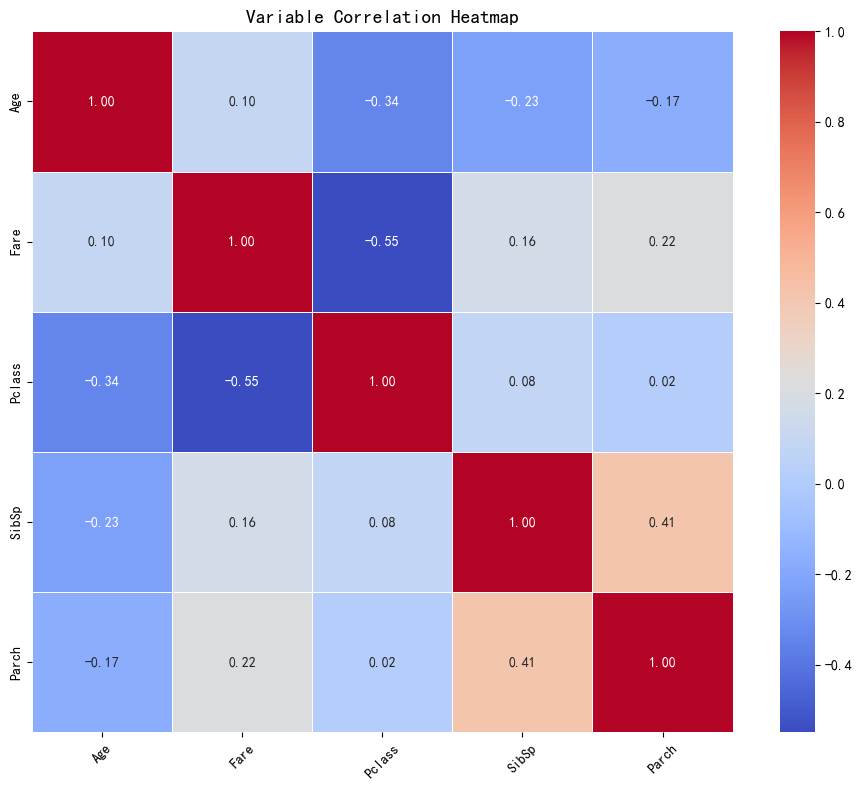

In [67]:
numeric_vars = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
corr_matrix = df[numeric_vars].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
                     fmt='.2f', linewidths=0.5, square=True)
plt.title('Variable Correlation Heatmap', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

## We retain the values of other dimensions which helps us to get a better view and broaded representation of the data. 

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [68]:
import re
from collections import Counter

# 加载pos.txt和neg.txt文件
def load_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = [line.strip() for line in f if line.strip()]
    return lines

pos_reviews = load_text_file('pos.txt')
neg_reviews = load_text_file('neg.txt')


In [69]:
# Use this cell for your code


def get_most_common_words(reviews, top_n=20):

    all_words = []
    for review in reviews:
        words = review.split()
        all_words.extend(words)
    word_counts = Counter(all_words)
    most_common = word_counts.most_common(top_n)
    return most_common
pos_common_words = get_most_common_words(pos_reviews, top_n=20)
neg_common_words = get_most_common_words(neg_reviews, top_n=20)

print("\nmost common words in positive:")
for word, count in pos_common_words:
    print(f"{word}: {count}")

print("\nmost common words in negative:")
for word, count in neg_common_words:
    print(f"{word}: {count}")


most common words in positive:
great: 435906
work: 427780
use: 345233
good: 291448
fit: 273505
instal: 229408
product: 210084
look: 181401
just: 180420
like: 175725
easi: 162864
light: 147321
car: 147195
price: 144891
need: 136519
perfect: 124405
time: 123938
replac: 122261
qualiti: 119732
nice: 119314

most common words in negative:
work: 39998
use: 37244
fit: 31293
product: 24394
just: 23580
light: 22907
like: 20685
time: 19665
look: 18824
instal: 18709
did: 18446
good: 17295
dont: 17136
buy: 16885
car: 16694
return: 15227
tri: 14957
doe: 14201
replac: 13509
didnt: 13045


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

pos_reviews = load_text_file('pos.txt')
neg_reviews = load_text_file('neg.txt')

pos_text = ' '.join(pos_reviews)
neg_text = ' '.join(neg_reviews)
documents = [pos_text, neg_text]
labels = ['Positive', 'Negative']

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=labels, columns=feature_names)




3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [71]:
def get_top_tfidf_words(tfidf_df, label, top_n=20):
    scores = tfidf_df.loc[label]
    top_words = scores.sort_values(ascending=False).head(top_n)
    return top_words

pos_top_words = get_top_tfidf_words(tfidf_df, 'Positive')
neg_top_words = get_top_tfidf_words(tfidf_df, 'Negative')

print("\nHighest TF/IDF score words in positive reviews:")
print(pos_top_words.to_string())

print("\nHighest TF/IDF score words in negative reviews:")
print(neg_top_words.to_string())




Highest TF/IDF score words in positive reviews:
great      0.367661
work       0.360807
use        0.291184
good       0.245819
fit        0.230685
instal     0.193492
product    0.177194
look       0.153001
just       0.152174
like       0.148214
easi       0.137366
light      0.124257
car        0.124150
price      0.122207
need       0.115146
perfect    0.104928
time       0.104534
replac     0.103120
qualiti    0.100987
nice       0.100634

Highest TF/IDF score words in negative reviews:
work       0.303186
use        0.282311
fit        0.237202
product    0.184907
just       0.178737
light      0.173636
like       0.156793
time       0.149061
look       0.142686
instal     0.141815
did        0.139821
good       0.131097
dont       0.129891
buy        0.127989
car        0.126541
return     0.115421
tri        0.113374
doe        0.107644
replac     0.102399
didnt      0.098881


## TF/IDF helps us identify words that appear frequently in one category but not in another,but 'not' is a usual word and may get removed in preprocess, causing less obvious results.

4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

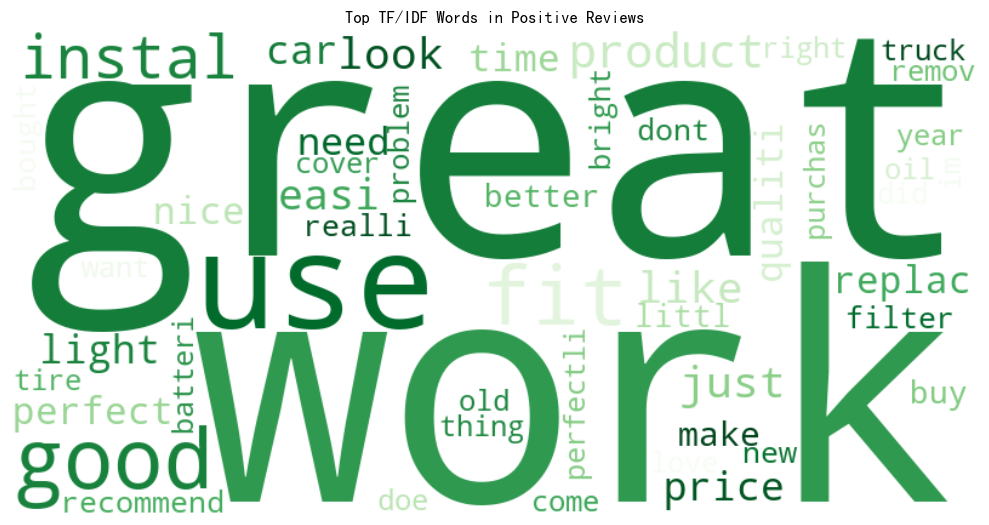

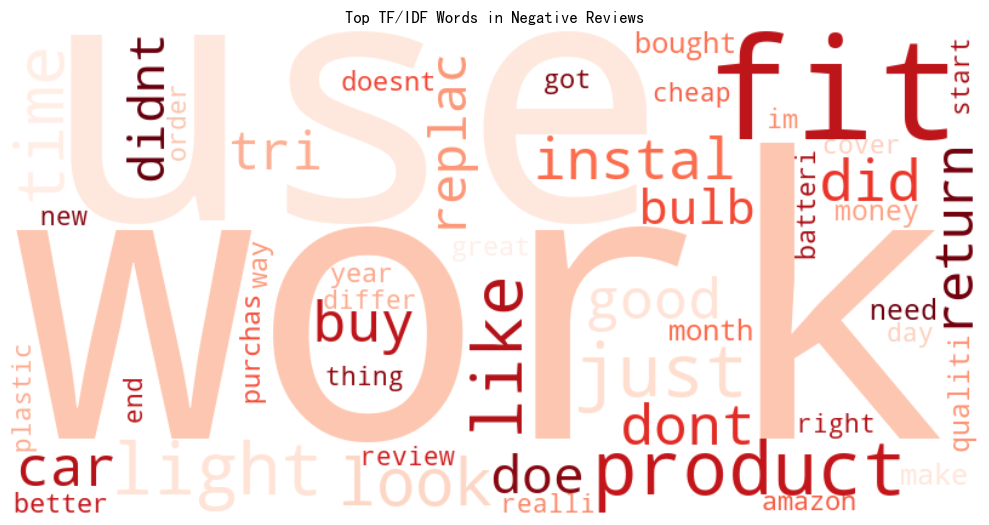

In [72]:
from wordcloud import WordCloud
def generate_wordcloud(word_scores, title, color_map='viridis'):

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color_map)
    wordcloud.generate_from_frequencies(word_scores)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
pos_cloud_words = get_top_tfidf_words(tfidf_df, 'Positive', top_n=50)
neg_cloud_words = get_top_tfidf_words(tfidf_df, 'Negative', top_n=50)

generate_wordcloud(pos_cloud_words, 'Top TF/IDF Words in Positive Reviews', 'Greens')
generate_wordcloud(neg_cloud_words, 'Top TF/IDF Words in Negative Reviews', 'Reds')


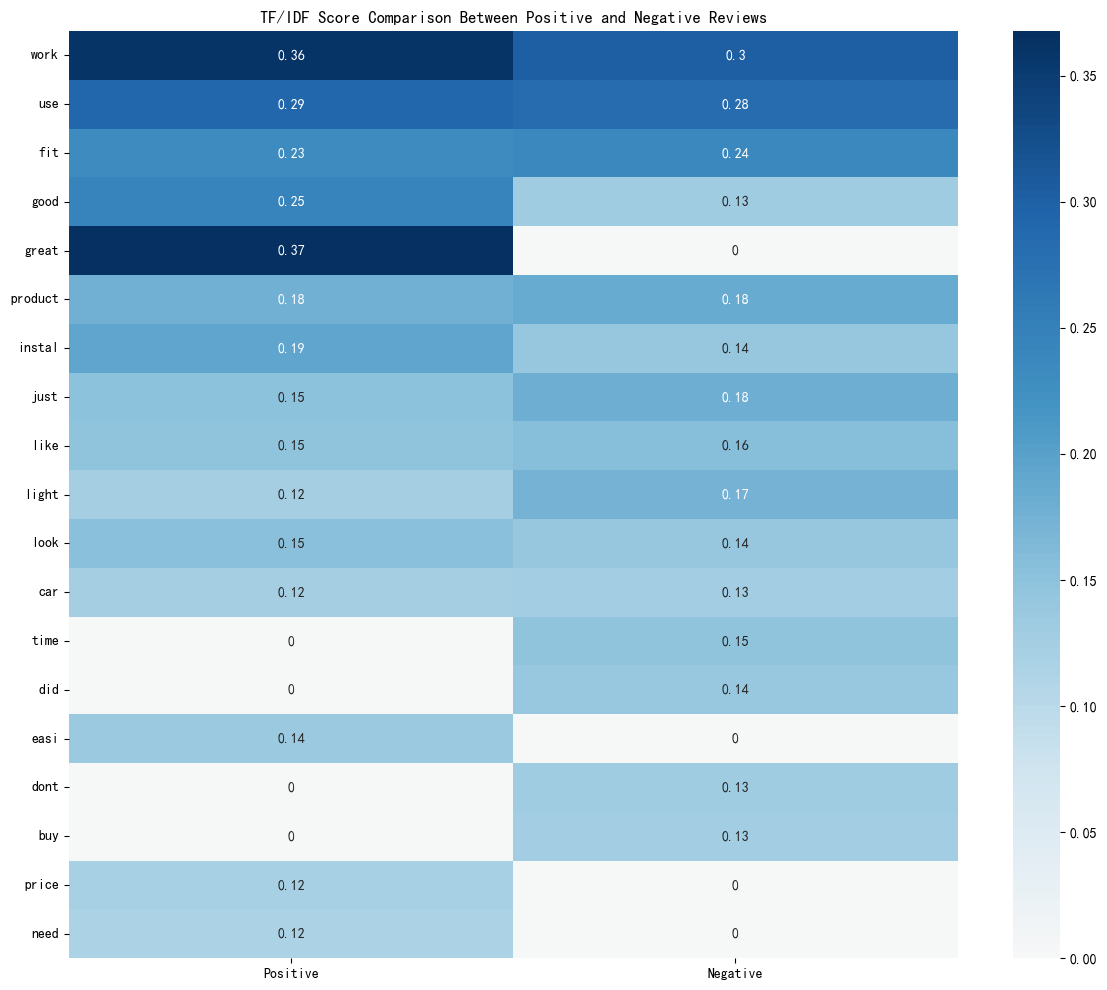

In [73]:

def plot_comparison_heatmap(pos_words, neg_words, top_n=15):

    pos_top = pos_words.head(top_n)
    neg_top = neg_words.head(top_n)
    all_top_words = list(set(pos_top.index).union(set(neg_top.index)))
    comparison_df = pd.DataFrame(index=all_top_words, columns=['Positive', 'Negative']).fillna(0)
    
    for word, score in pos_top.items():
        comparison_df.loc[word, 'Positive'] = score
    
    for word, score in neg_top.items():
        comparison_df.loc[word, 'Negative'] = score

    comparison_df['Total'] = comparison_df.sum(axis=1)
    comparison_df = comparison_df.sort_values('Total', ascending=False)
    comparison_df = comparison_df.drop('Total', axis=1)
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(comparison_df, annot=True, cmap='RdBu', center=0)
    plt.title('TF/IDF Score Comparison Between Positive and Negative Reviews')
    plt.tight_layout()
    plt.show()
plot_comparison_heatmap(pos_top_words, neg_top_words)


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



In [74]:
news = pd.read_csv("news_articles.csv")
# news.head()

In [75]:
import plotly.express as px
type_counts = news['type'].value_counts()
fig = px.pie(type_counts,
             values=type_counts.values,
             names=type_counts.index,
             template="seaborn")
fig.update_traces(rotation=45, pull=0.03, textinfo="percent+label")
fig.show()

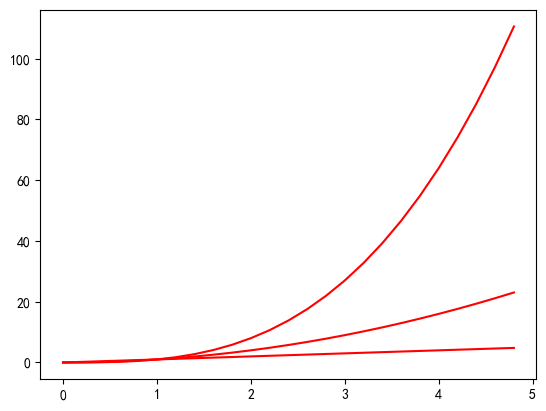

In [76]:
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r', t, t**2, 'r', t, t**3, 'r')
plt.show()

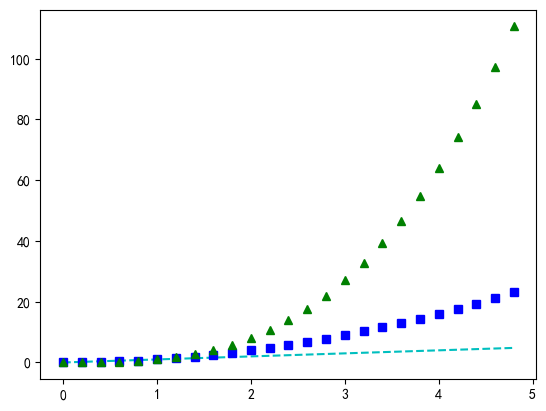

In [77]:
t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'c--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

C:\Users\dream\AppData\Local\Temp\ipykernel_28076\80749903.py:79: UserWarning:

FixedFormatter should only be used together with FixedLocator



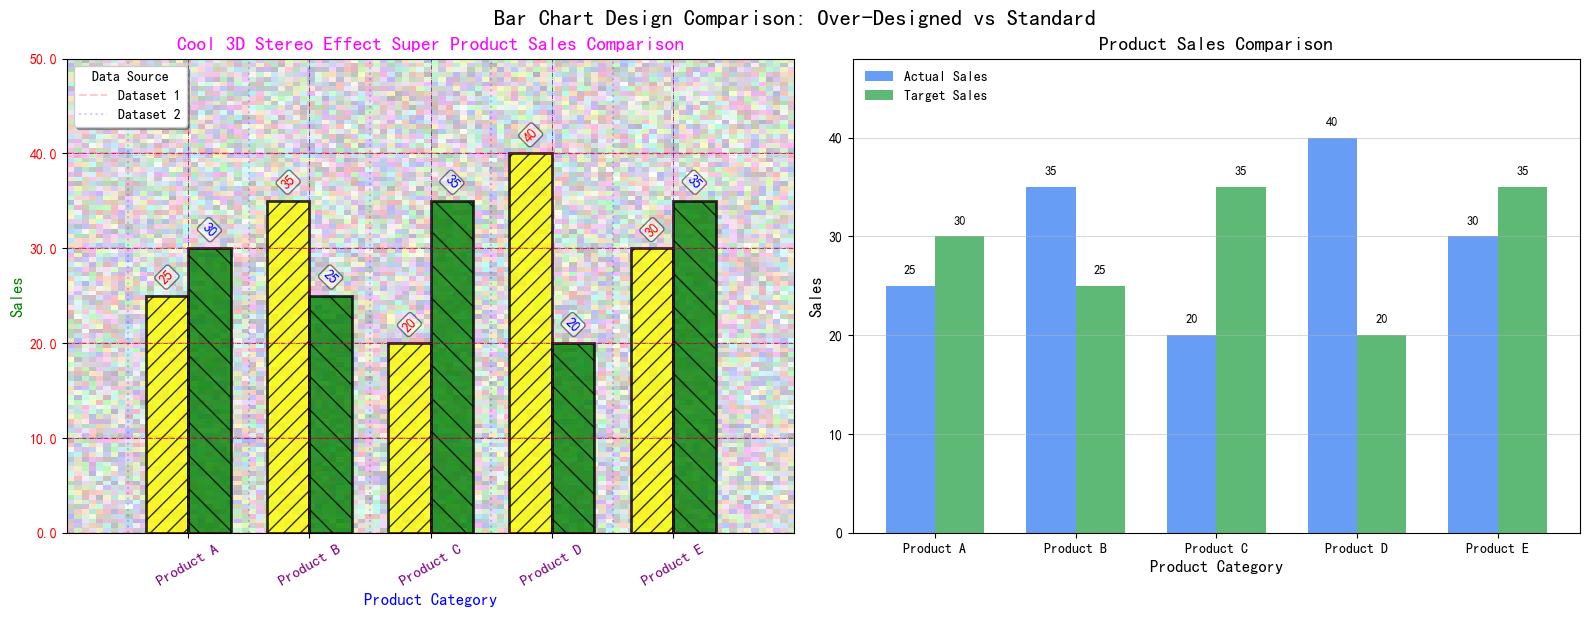

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

categories = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
values1 = [25, 35, 20, 40, 30]
values2 = [30, 25, 35, 20, 35]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

background_color = np.random.rand(100, 100, 3)
ax1.imshow(background_color, aspect='auto', alpha=0.3, extent=[-1, 5, 0, 50])

ax1.grid(True, color='purple', linestyle='-.', linewidth=0.5)

for i in range(5):
    ax1.axhline(y=10*i, color='red', linestyle='--', alpha=0.2)
    ax1.axvline(x=i-0.5, color='blue', linestyle=':', alpha=0.2)

bar_width = 0.35
x_pos = np.arange(len(categories))

bars1 = ax1.bar(
    x_pos - bar_width/2,
    values1,
    width=bar_width,
    color='yellow',
    edgecolor='black',
    linewidth=2,
    hatch='//',
    alpha=0.8
)

bars2 = ax1.bar(
    x_pos + bar_width/2,
    values2,
    width=bar_width,
    color='green',
    edgecolor='black',
    linewidth=2,
    hatch='\\',
    alpha=0.8
)

for bar in bars1:
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height() + 1,
        f'{bar.get_height()}',
        ha='center',
        va='bottom',
        rotation=45,
        fontsize=10,
        color='red',
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.2')
    )

for bar in bars2:
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height() + 1,
        f'{bar.get_height()}',
        ha='center',
        va='bottom',
        rotation=-45,
        fontsize=10,
        color='blue',
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.2')
    )

ax1.set_title('Cool 3D Stereo Effect Super Product Sales Comparison', fontsize=14, fontweight='bold', color='magenta')
ax1.set_xlabel('Product Category', fontsize=12, fontweight='bold', color='blue')
ax1.set_ylabel('Sales', fontsize=12, fontweight='bold', color='green')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(categories, rotation=30, fontsize=11, color='purple')
ax1.set_yticklabels(ax1.get_yticks(), fontsize=10, color='red')

ax1.legend(
    ['Dataset 1', 'Dataset 2'],
    title='Data Source',
    loc='upper left',
    shadow=True,
    fancybox=True,
    fontsize=10
)

circle = plt.Circle((2, 25), 15, color='red', fill=False, linestyle='--', alpha=0.1)
ax1.add_patch(circle)

ax2.set_facecolor('white')

ax2.grid(axis='y', linestyle='-', alpha=0.7, linewidth=0.5)

bar_width = 0.35
x_pos = np.arange(len(categories))

bars1 = ax2.bar(
    x_pos - bar_width/2,
    values1,
    width=bar_width,
    color='#4285F4',
    edgecolor='none',
    alpha=0.8,
    label='Actual Sales'
)

bars2 = ax2.bar(
    x_pos + bar_width/2,
    values2,
    width=bar_width,
    color='#34A853',
    edgecolor='none',
    alpha=0.8,
    label='Target Sales'
)

for bar in bars1:
    ax2.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height() + 1,
        f'{bar.get_height()}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

for bar in bars2:
    ax2.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height() + 1,
        f'{bar.get_height()}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

ax2.set_title('Product Sales Comparison', fontsize=14, fontweight='bold')
ax2.set_xlabel('Product Category', fontsize=12)
ax2.set_ylabel('Sales', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(categories, rotation=0, fontsize=10)

ax2.legend(
    ['Actual Sales', 'Target Sales'],
    loc='upper left',
    frameon=False,
    fontsize=10
)

ax2.set_ylim(0, max(max(values1), max(values2)) * 1.2)

plt.tight_layout()

plt.suptitle('Bar Chart Design Comparison: Over-Designed vs Standard', fontsize=16, fontweight='bold', y=1.02)

plt.show()

**Submit a PDF with all the charts (the ones you found and the ones you produced).**